## 2 Using Networkx to Explore Pathfinding Specific graphs Drawing and creating the graph in networkX 

Setup of simple examples using NetworkX
- take an example and create networkx graph
- steps involved 
- running dijkstra and A* on the graph 


In [1]:
#image below using <img src="files/wgraph5.png"> 

Edx Graph From Edx week 2 A* course / Archived course sign in. We're using this graph because  
- https://www.edx.org/course/artificial-intelligence-uc-berkeleyx-cs188-1x
- It's archived and Free - week 2 covers A* in detail 
- It's a small graph 
- Has a good heuristic example 
- Fairly typical of what's on the web 

  https://courses.edx.org/courses/BerkeleyX/CS188.1x-4/1T2015/courseware/c78976d210314651abb740912d8279bb/e8c2d3dd71a84472997173f55c98a35c/  
<img src="files/wgraph5.png">

In [2]:
import networkx as nx

In [3]:
import  matplotlib.pyplot as plt  

In [4]:
#inline matplotlib 
%matplotlib inline

In [5]:
g1 = nx.Graph()

In [6]:
type(g1)

networkx.classes.graph.Graph

In [7]:
print (dir(g1)) 

['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_cycle', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_path', 'add_star', 'add_weighted_edges_from', 'adj', 'adjacency_iter', 'adjacency_list', 'adjlist_dict_factory', 'clear', 'copy', 'degree', 'degree_iter', 'edge', 'edge_attr_dict_factory', 'edges', 'edges_iter', 'get_edge_data', 'graph', 'has_edge', 'has_node', 'is_directed', 'is_multigraph', 'name', 'nbunch_iter', 'neighbors', 'neighbors_iter', 'node', 'node_dict_factory', 'nodes', 'nodes_iter', 'nodes_with_selfloops', 'number_of_edges', 'number_of_nodes', 'number_of_selfloops', 'order', 'remove_edge', 'remove_edges_from', 'remove_node',

In [8]:
g1.add_nodes_from(['s','a','b','c','g'])

In [9]:
g1.nodes()

['a', 's', 'g', 'c', 'b']

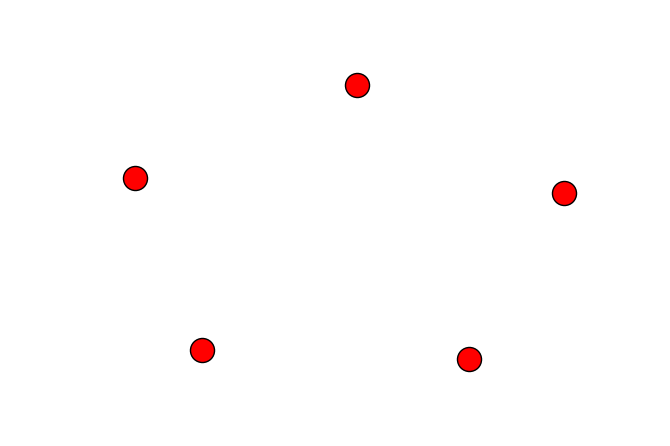

In [10]:
nx.draw(g1)  #http://networkx.github.io/documentation/development/reference/generated/networkx.drawing.nx_pylab.draw.html

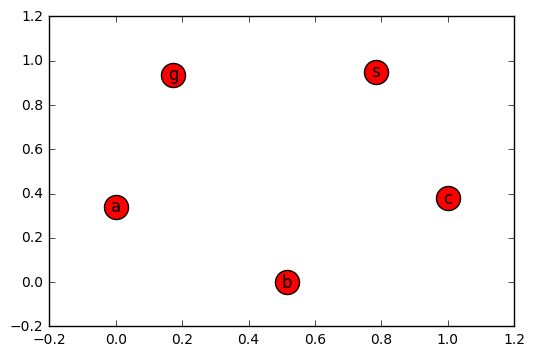

In [11]:
nx.draw_networkx(g1, node_color='r') 
#http://networkx.github.io/documentation/development/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx

In [12]:
#add edges
g1.add_edge('s','a')
g1.add_edge('s','b')
g1.add_edge('a','b')
g1.add_edge('a','c')
g1.add_edge('a','g')
g1.add_edge('b','c')
g1.add_edge('c','g')

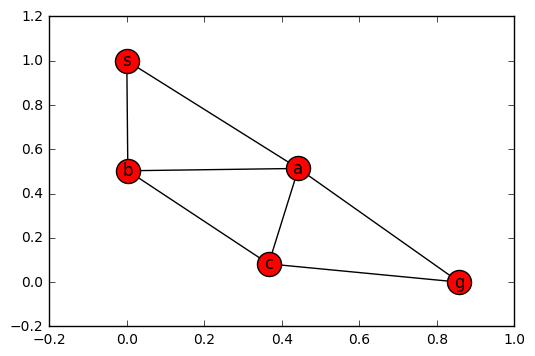

In [13]:
#draw - note it's a different layout each time, we'll fix that 
nx.draw_networkx(g1)

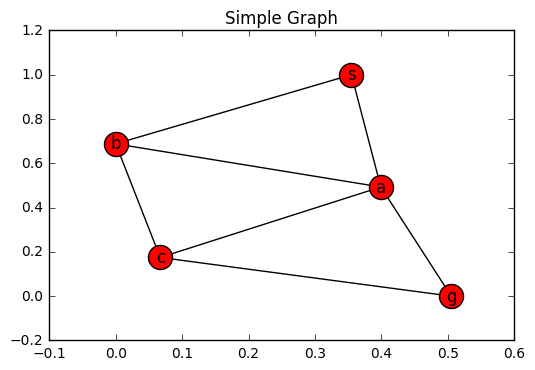

In [14]:
#title - note it's in a grid, we will need that positioning 
nx.draw_networkx(g1, with_labels=True)
plt.title("Simple Graph")
plt.show()

Reminder of what we're looking for ...
<img src="files/wgraph5.png">

In [15]:
#labels 
g1.add_edge('s','a', weight=1)
g1.add_edge('s','b', weight=4)
g1.add_edge('a','b', weight=2)
g1.add_edge('a','c', weight=5)
g1.add_edge('a','g', weight=12)
g1.add_edge('b','c', weight=2)
g1.add_edge('c','g', weight=3)

In [16]:
g1.edges(data=True)

[('a', 's', {'weight': 1}),
 ('a', 'g', {'weight': 12}),
 ('a', 'c', {'weight': 5}),
 ('a', 'b', {'weight': 2}),
 ('s', 'b', {'weight': 4}),
 ('g', 'c', {'weight': 3}),
 ('c', 'b', {'weight': 2})]

In [17]:
from IPython.display import IFrame

In [18]:
IFrame('http://networkx.readthedocs.org/en/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html?highlight=draw_networkx', width='90%',height=460)

In [19]:
for source, sink, data in g1.edges(data=True):   #confirms print out 
    print (source,sink, data )

a s {'weight': 1}
a g {'weight': 12}
a c {'weight': 5}
a b {'weight': 2}
s b {'weight': 4}
g c {'weight': 3}
c b {'weight': 2}


In [20]:
dict([( (source,sink), data['weight']) for source,sink,data in g1.edges(data=True)])

{('a', 'b'): 2,
 ('a', 'c'): 5,
 ('a', 'g'): 12,
 ('a', 's'): 1,
 ('c', 'b'): 2,
 ('g', 'c'): 3,
 ('s', 'b'): 4}

In [21]:
edge_labs = dict([( (u,v), d['weight']) for u,v,d in g1.edges(data=True)])
print(edge_labs)

{('a', 's'): 1, ('s', 'b'): 4, ('a', 'g'): 12, ('a', 'c'): 5, ('a', 'b'): 2, ('g', 'c'): 3, ('c', 'b'): 2}


In [22]:
#pos = nx.spectral_layout(g1)
pos = nx.spring_layout(g1)

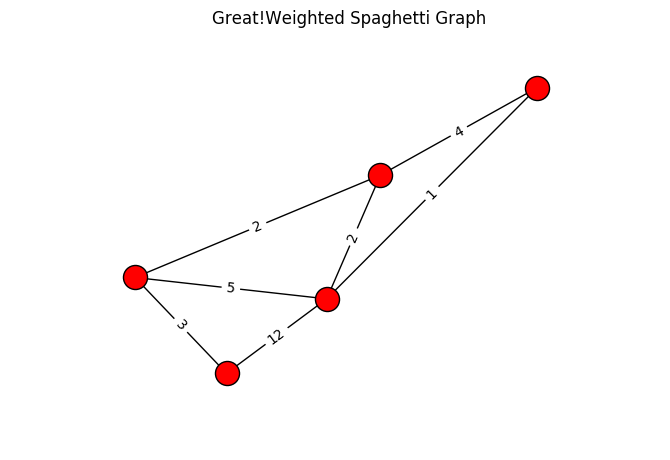

In [23]:
nx.draw(g1, pos) #since nx.draw no labels as default 
nx.draw_networkx_edge_labels(g1, pos, edge_labels=edge_labs)
plt.title("Great!Weighted Spaghetti Graph")
plt.show()

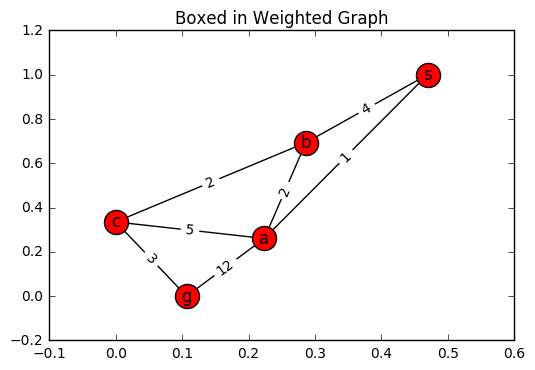

In [24]:
nx.draw_networkx(g1, pos, node_color='r')
nx.draw_networkx_edge_labels(g1, pos, edge_labels=edge_labs)
# nx.draw_networkx_nodes(g1, pos, node_color='r')
plt.title("Boxed in Weighted Graph")
plt.show()

In [25]:
#pos fixed pos
#set of fixed positions for the node 
fixed_positions = {'s':(0,4),'a':(4,6), 'b':(4,2), 'c':(8,4), 'g':(12,4)}#dict with two of the positions set

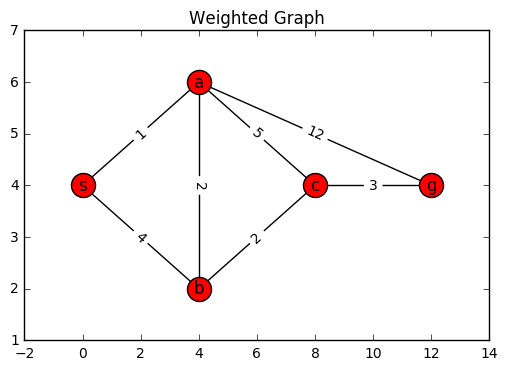

In [26]:
pos = fixed_positions
nx.draw_networkx(g1, pos, with_labels=True, node_color='r')
nx.draw_networkx_edge_labels(g1, pos, edge_labels=edge_labs)
# nx.draw_networkx_nodes(g1, pos, node_color='r')
plt.title("Weighted Graph")
# plt.axis('off')
plt.show()

In [27]:
#remove axis

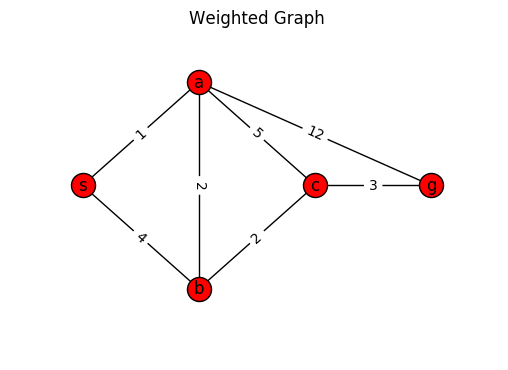

In [28]:
pos = fixed_positions
nx.draw_networkx(g1, pos, with_labels=True, node_color='r')
nx.draw_networkx_edge_labels(g1, pos, edge_labels=edge_labs)
# nx.draw_networkx_nodes(g1, pos, node_color='b')
plt.title("Weighted Graph")
plt.axis('off')   #removes axis
plt.show()

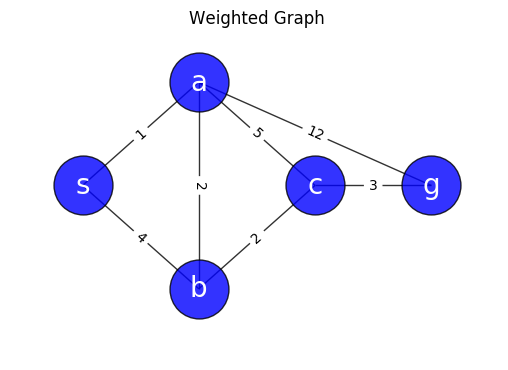

In [29]:
#little weird..billard balls, would like lite blue... 
pos = fixed_positions
nx.draw_networkx(g1, pos, with_labels=True, node_size=1800, node_color='b', alpha=0.8, font_size=20,
                font_color='w')
nx.draw_networkx_edge_labels(g1, pos, edge_labels=edge_labs)
# nx.draw_networkx_nodes(g1, pos, node_size=600, node_color='w')
plt.title("Weighted Graph")
plt.axis('off')   #removes axis
plt.show()

In [30]:
from IPython.display import IFrame
IFrame('http://www.color-hex.com/color/a0cbe2',width='100%', height=200)

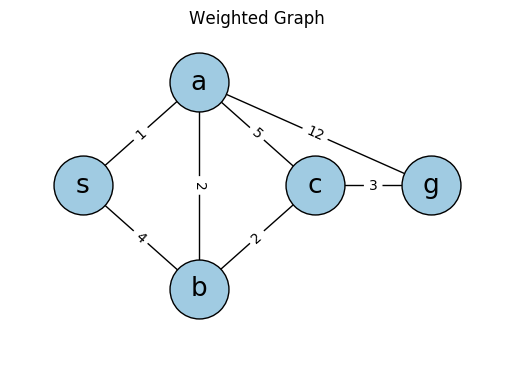

In [31]:
#
LIGHT_BLUE =  '#A0CBE2'  #html hex colors http://www.color-hex.com/color/a0cbe2
pos = fixed_positions
nx.draw_networkx(g1, pos, with_labels=True, node_size=1800, node_color=LIGHT_BLUE, font_size= 19 ) #node_color='b'
nx.draw_networkx_edge_labels(g1, pos, edge_labels=edge_labs) 

#nodes = nx.draw_networkx_nodes(g1,pos)
#nodes.set_edgecolor('g')

# nx.draw_networkx_nodes(g1, pos, node_shape =None, node_color=LIGHT_BLUE , font_size = 20    )
#https://networkx.github.io/documentation/latest/_modules/networkx/drawing/nx_pylab.html 

plt.title("Weighted Graph")
plt.axis('off')   #removes axis
plt.show()

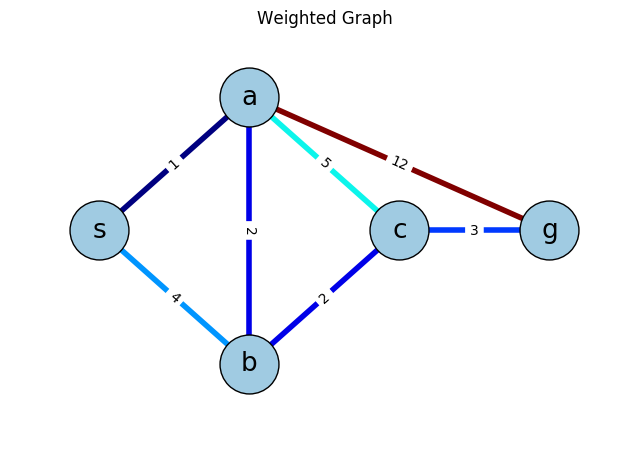

In [70]:
# Colorize the edges according to the weight as well
colors = [g1[u][v]['weight'] for u,v in g1.edges()]

LIGHT_BLUE =  '#A0CBE2'  #html hex colors http://www.color-hex.com/color/a0cbe2
pos = fixed_positions
nx.draw(g1, pos=pos, with_labels=True, node_size=1800, node_color=LIGHT_BLUE, font_size= 19,
       edge_color=colors, width=4)
nx.draw_networkx_edge_labels(g1, pos, edge_labels=edge_labs)

plt.title("Weighted Graph")
plt.axis('off')   #removes axis
plt.show()

In [73]:
nx.shortest_path(g1,'s','g')

['s', 'a', 'g']

In [74]:
nx.dijkstra_path(g1, 's','g')

['s', 'a', 'b', 'c', 'g']

In [75]:
nx.astar_path(g1,'s', 'g')

['s', 'a', 'b', 'c', 'g']

In [76]:
nx.astar_path(g1,'s', 'g', heuristic = None )

['s', 'a', 'b', 'c', 'g']

# Digressions! 

In [78]:
pos

{'a': (4, 6), 'b': (4, 2), 'c': (8, 4), 'g': (12, 4), 's': (0, 4)}

In [79]:
import math

In [81]:
print("a(x)",pos['a'][0], "b(x)",pos['b'][0])
print(math.sqrt(  (pos['a'][0] - pos['b'][0]) **2 ))

a(x) 4 b(x) 4
0.0


In [83]:
def d2(a,b):
    z = math.sqrt( ((pos[b][0]- pos[a][0])**2) + ((pos[b][1]-pos[a][1])**2)  ) 
    print(z)
    return z 

In [84]:
#write a little function... 
nx.astar_path(g1,'s','g',  heuristic=d2 )

8.246211251235321
8.246211251235321
0.0
4.0


['s', 'a', 'c', 'g']

In [85]:
pos['a']

(4, 6)

In [86]:
pos['a'][0]

4

In [88]:
pos['a'][0]-pos['b'][0]

0